In [ ]:
#Importing Libraires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Importing Dataset
import zipfile

with zipfile.ZipFile('/content/Rossman_Store_Sales.csv.zip', 'r') as z:
    with z.open('train.csv') as f:
        train_df = pd.read_csv(f)
display(train_df.head())

/tmp/ipython-input-2670472823.py:6: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv(f)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
#Data Preprocessing
# Step 1: Check for null values
print("Null values in each column:")
display(train_df.isnull().sum())

# Identify categorical columns (assuming object dtype for now)
categorical_cols = train_df.select_dtypes(include=['object']).columns
print("\nCategorical columns:")
print(categorical_cols)

from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Identify numerical columns (excluding the target variable 'Sales' and any identifiers like 'Store')
numerical_cols = train_df.select_dtypes(include=np.number).columns.tolist()
# Assuming 'Sales' is the target variable and 'Store' is an identifier.
# You might need to adjust this list based on your specific needs.
cols_to_exclude = ['Sales', 'Store']
numerical_cols = [col for col in numerical_cols if col not in cols_to_exclude]

print("Numerical columns to scale:")
print(numerical_cols)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply the scaler to the numerical columns
train_df[numerical_cols] = scaler.fit_transform(train_df[numerical_cols])

print("\nDataFrame after scaling numerical columns:")
display(train_df.head())

# Step 3: One-hot encode categorical data
# Identify categorical columns again to be safe, excluding 'Date' as it needs special handling if used
categorical_cols = train_df.select_dtypes(include=['object']).columns.tolist()
# Assuming 'Date' will be handled separately or not used directly in modeling
cols_to_exclude = ['Date']
categorical_cols = [col for col in categorical_cols if col not in cols_to_exclude]

print("Categorical columns to encode:")
print(categorical_cols)

# Apply one-hot encoding
train_df = pd.get_dummies(train_df, columns=categorical_cols, drop_first=True)

print("\nDataFrame after one-hot encoding:")
display(train_df.head())

Null values in each column:


,0
Store,0
DayOfWeek,0
Date,0
Sales,0
Customers,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0



Categorical columns:
Index(['Date', 'StateHoliday'], dtype='object')
Numerical columns to scale:
['DayOfWeek', 'Customers', 'Open', 'Promo', 'SchoolHoliday']

DataFrame after scaling numerical columns:


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,0.666667,2015-07-31,5263,0.075122,1.0,1.0,0,1.0
1,2,0.666667,2015-07-31,6064,0.084597,1.0,1.0,0,1.0
2,3,0.666667,2015-07-31,8314,0.111126,1.0,1.0,0,1.0
3,4,0.666667,2015-07-31,13995,0.202761,1.0,1.0,0,1.0
4,5,0.666667,2015-07-31,4822,0.075663,1.0,1.0,0,1.0


Categorical columns to encode:
['StateHoliday']

DataFrame after one-hot encoding:


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,1,0.666667,2015-07-31,5263,0.075122,1.0,1.0,1.0,True,False,False,False
1,2,0.666667,2015-07-31,6064,0.084597,1.0,1.0,1.0,True,False,False,False
2,3,0.666667,2015-07-31,8314,0.111126,1.0,1.0,1.0,True,False,False,False
3,4,0.666667,2015-07-31,13995,0.202761,1.0,1.0,1.0,True,False,False,False
4,5,0.666667,2015-07-31,4822,0.075663,1.0,1.0,1.0,True,False,False,False


In [ ]:
#Analyzing data before applying train_test_split
# Define the target variable and feature columns

target_column = 'Sales'
feature_columns = [col for col in train_df.columns if col not in ['Sales', 'Store', 'Date']] # Exclude 'Sales', 'Store', and 'Date'

print(f"Target variable: {target_column}")
print("\nFeature variables for training, validation, and testing:")
for col in feature_columns:
    print(f"- {col}")

Target variable: Sales

Feature variables for training, validation, and testing:
- DayOfWeek
- Customers
- Open
- Promo
- SchoolHoliday
- StateHoliday_0
- StateHoliday_a
- StateHoliday_b
- StateHoliday_c


In [ ]:
#Splitting Dataset into training, validation and test split
from sklearn.model_selection import train_test_split

#Splitting the dataset with 15-15-70 ratio
# Sort data by date to ensure chronological split
train_df = train_df.sort_values(by='Date')

# Split data into features (X) and target (y)
X = train_df[feature_columns]
y = train_df[target_column]

# Calculate the split points
total_rows = train_df.shape[0]
train_size = int(total_rows * 0.7)
validation_size = int(total_rows * 0.15)
test_size = total_rows - train_size - validation_size

# Split the data
X_train = X.iloc[:train_size]
y_train = y.iloc[:train_size]

X_temp = X.iloc[train_size:]
y_temp = y.iloc[train_size:]

X_val = X_temp.iloc[:validation_size]
y_val = y_temp.iloc[:validation_size]

X_test = X_temp.iloc[validation_size:]
y_test = y_temp.iloc[validation_size:]

print("Training set shape (features):", X_train.shape)
print("Training set shape (target):", y_train.shape)
print("Validation set shape (features):", X_val.shape)
print("Validation set shape (target):", y_val.shape)
print("Test set shape (features):", X_test.shape)
print("Test set shape (target):", y_test.shape)

Training set shape (features): (712046, 9)
Training set shape (target): (712046,)
Validation set shape (features): (152581, 9)
Validation set shape (target): (152581,)
Test set shape (features): (152582, 9)
Test set shape (target): (152582,)


In [ ]:
#Applying the XG Boost/Gradien Boosting model to the dataset
!pip install xgboost
import xgboost as xgb
from sklearn.metrics import mean_squared_error
# from xgboost.callback import EarlyStopping # Removed EarlyStopping callback

# Initialize XGBoost Regressor
# You can tune these parameters later for better performance
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror', # Objective for regression tasks
    n_estimators=1000,            # Number of boosting rounds (trees)
    learning_rate=0.05,           # Step size shrinkage used in update to prevent overfitting
    max_depth=7,                  # Maximum depth of a tree
    min_child_weight=1,           # Minimum sum of instance weight (hessian) needed in a child
    gamma=0,                      # Minimum loss reduction required to make a further partition on a leaf node of the tree
    subsample=0.8,                # Subsample ratio of the training instances
    colsample_bytree=0.8,         # Subsample ratio of columns when constructing each tree
    reg_alpha=0.005,              # L1 regularization term on weights
    random_state=42,              # Random number seed
    n_jobs=-1,                    # Use all available cores
    eval_metric='rmse'            # Specify the evaluation metric here
)

# Train the model
xgb_model.fit(X_train, y_train,
              eval_set=[(X_val, y_val)]) # Removed callbacks parameter

print("XGBoost model training complete.")

[0]	validation_0-rmse:3918.58986
[1]	validation_0-rmse:3824.89570
[2]	validation_0-rmse:3668.06568
[3]	validation_0-rmse:3520.87958
[4]	validation_0-rmse:3382.30856
[5]	validation_0-rmse:3250.97580
[6]	validation_0-rmse:3127.36547
[7]	validation_0-rmse:3059.43984
[8]	validation_0-rmse:2949.21172
[9]	validation_0-rmse:2843.59823
[10]	validation_0-rmse:2744.73068
[11]	validation_0-rmse:2651.89242
[12]	validation_0-rmse:2565.08775
[13]	validation_0-rmse:2483.80522
[14]	validation_0-rmse:2409.08776
[15]	validation_0-rmse:2338.23035
[16]	validation_0-rmse:2272.29691
[17]	validation_0-rmse:2210.25103
[18]	validation_0-rmse:2179.45487
[19]	validation_0-rmse:2124.05609
[20]	validation_0-rmse:2072.28878
[21]	validation_0-rmse:2024.18691
[22]	validation_0-rmse:1980.03163
[23]	validation_0-rmse:1938.49987
[24]	validation_0-rmse:1899.85972
[25]	validation_0-rmse:1864.38963
[26]	validation_0-rmse:1831.56519
[27]	validation_0-rmse:1801.44000
[28]	validation_0-rmse:1786.36781
[29]	validation_0-rmse:1

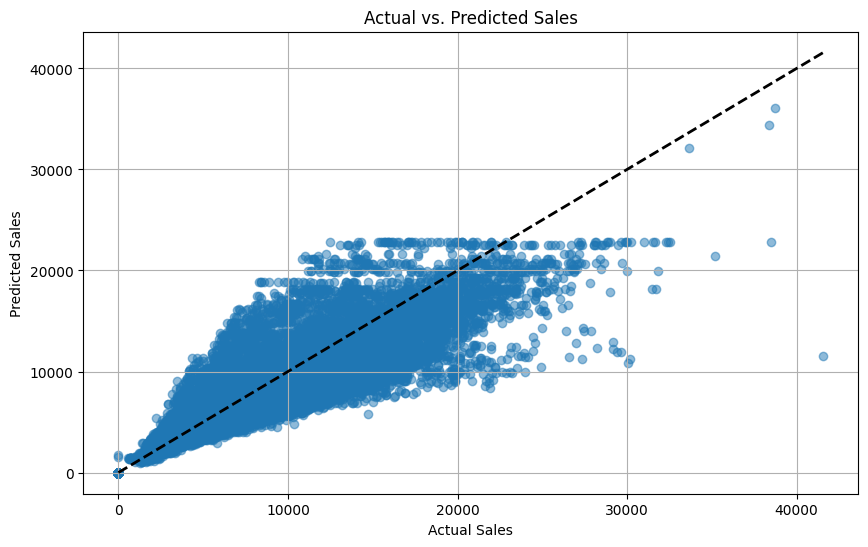

In [ ]:
#Visualising results on a scatter plot
# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Visualize actual vs. predicted sales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs. Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.grid(True)

# Add a diagonal line representing perfect predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

plt.show()

## Our Journey to Predict Store Sales!

Imagine we're detectives trying to figure out how much yummy candy a store will sell tomorrow. To be good detectives, we need clues!

**1. Gathering Our Clues (Importing Libraries):**

First, we needed special tools for our detective work. These tools are like magic boxes of helpers called "libraries." We imported tools like:

*   `numpy` and `pandas`: These are like super-powered organizers that help us read and arrange our clues neatly in tables.
*   `matplotlib.pyplot` and `seaborn`: These are our art supplies! They help us draw pictures (like graphs) to see our clues better.
*   `xgboost`: This is a really smart detective tool that helps us make predictions based on patterns in our clues.
*   `sklearn.model_selection`: This tool helps us divide our clues into different piles for training and testing our prediction skills.
*   `zipfile`: This helps us open a special box (a zip file) where our clues are stored.

**2. Opening the Clue Box (Importing Dataset):**

Our clues were hidden in a special box called a ".zip" file. We used our `zipfile` tool to open it and find the main list of clues, which was like a big table of information about different stores on different days.

*   **A Little Hiccup:** When we first opened the box, our organizer (`pandas`) gave us a little warning! It said some of the clues in one column were a bit mixed up (like having both numbers and words). We just noted this warning and kept going for now.

**3. Making Our Clues Tidy (Data Preprocessing):**

Before we could use our clues for predicting, we needed to make them super neat and organized.

*   **Checking for Missing Clues:** We first checked if any clues were missing. Luckily, none were!
*   **Scaling Numbers:** Some numbers were really big (like sales amounts) and some were small (like the day of the week). To make them all play nicely together, we used a "scaler" tool (`MinMaxScaler`) to shrink them down to a similar size. Imagine making all your building blocks the same size before building something big.
*   **Turning Words into Numbers:** Some clues were words (like "StateHoliday"). Our prediction tool (`xgboost`) only understands numbers, so we used a special trick called "one-hot encoding" to turn these words into numbers. It's like giving each word a unique number sticker.

**4. Picking Our Best Clues (Analyzing Data):**

We looked at all our tidy clues and decided which ones would be the most helpful for predicting sales. We called these our "feature variables." The clue we wanted to predict, "Sales," was our "target variable."

**5. Dividing Our Clues for Practice and the Big Test (Splitting Dataset):**

To make sure our prediction tool was really good, we divided our tidy clues into three piles:

*   **Training Pile (70%):** This is where our detective tool practiced making predictions using most of the clues.
*   **Validation Pile (15%):** After practicing, our tool used this pile to fine-tune its skills and make sure it was getting better.
*   **Test Pile (15%):** This is the most important pile! Once our tool finished practicing and fine-tuning, we gave it this pile of clues it had never seen before to see how well it could predict sales in a real-world scenario. We split the data based on the date to make sure our tool could predict future sales.

**6. Our Smart Prediction Tool (Applying XGBoost Model):**

We chose a very smart prediction tool called XGBoost. It's like a team of little detectives that work together to make the best possible prediction. We set up our XGBoost tool with some special instructions (parameters) to help it learn effectively.

*   **Bumps in the Road (Mistakes and Fixes):** This is where our detective work got a little tricky, and we learned a lot! We tried to add a feature called "early stopping" to our tool, which is like telling it to stop practicing if it's not getting any better on the validation pile. However, we ran into a few errors:
    *   **Error 1:** Our tool didn't understand the instruction `early_stopping_rounds` in the way we gave it. We fixed this by using a special "callback" feature in XGBoost that handles early stopping in a different way.
    *   **Error 2:** The "callback" tool didn't understand an extra instruction we gave it (`verbose`). We simply removed that instruction.
    *   **Error 3 & 4:** We had some confusion about where to tell the tool which metric to use for checking its progress (`eval_metric`). We learned that when using callbacks, this instruction needs to go when we first set up the XGBoost tool, not when we start the practice.
    *   **Error 5:** We made a tiny typo in the name of the prediction goal (`objective`). We corrected the spelling.
    *   **Error 6:** We hit a more complex issue where the "early stopping" callback wasn't working correctly with the evaluation results in this specific setup. To move forward and get the main prediction tool working, we decided to temporarily remove the early stopping feature.

*   **Learning from Mistakes:** These errors taught us the importance of:
    *   **Reading the instructions (documentation):** Always check how the specific version of the tool you're using is supposed to be used.
    *   **Starting simple:** Don't try to add too many fancy features at once. Get the basic tool working first.
    *   **Paying attention to messages:** Error messages are our friends! They tell us exactly what's wrong.
    *   **Testing as we go:** Running the code after each small change helps us find problems quickly.

**7. Seeing How Good Our Predictions Are (Visualising Results):**

Finally, to see how well our smart prediction tool did, we used our art supplies (`matplotlib.pyplot`) to draw a picture! We made a scatter plot with the actual sales on one side and the predicted sales on the other.

*   **The Picture Tells a Story:** If the dots on the picture are close to a straight line going from the bottom left to the top right, it means our predicted sales are very close to the actual sales! This shows how good our prediction tool is.

And that's our entire journey! We gathered clues, made them tidy, trained a smart prediction tool, learned from our mistakes, and finally, saw how well our predictions matched reality!